<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_3_17(157_202).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER 4 모델 훈련

머신러닝 모델과 훈련 알고리즘 또한 작동원리를 파악하면 적절한 모델과 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있다. 디버깅이나 에러를 효율적으로 분석하는 데 도움이 되며 신경망을 이해하고 구축하는데 있어 필수적이다.

먼저 가장 간단한 선형회귀를 훈련시키는 두 가지 방법은 크게
- 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉 훈련세트에 대해 비용 함수를 최소화하는 모델 파라미트)를 해석적으로 구하는 것
- 경사하강법이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련세트에 대해 최소화시켜 앞과 동일한 파라미터로 수렴하는 방법으로 경사하강법의 변종으로 배치 경사하강법, 미니배치 경사하강법, 확률적 경사하강법도 살펴보고자 함

그 다음으로 비선형 데이터셋에 훈련시킬 수 있는 다항회귀의 경우 선형회귀보다 파라미터가 많아 훈련데이터에 과대적합되기 쉽기 때문에 학습곡선을 사용해 모델이 과적합되는지 감지하는 방법도 살펴보고자 함

## 4.1 선형 회귀

일반적으로 선형모델은 입력특성의 가중치합과 편향(절편)이라는 상수를 더해 예측을 생성

y hat = theta 0 + theta1 * x1 + theta2 * x2 + ... + thetaN xn
yhat: 예측값, n은 특성의 수, xi는 i번째 특성값, thetaj는 j번째 모델 파라미터

이 식은 벡터형태로 더 간단하게 

yhat = hg(x) = theta * x

로 표현 가능한데, theta가 편향 theta0부터 thetaN까지의 특성가중치를 담은 모델의 파라미터 벡터, x는 x1~xn까지 담은 샘플의 특성벡터, theta * x는 벡터 theta의 정곱, htheta는 모델 파라미터를 사용한 가설함수이다.

모델을 훈련시키는 것은 모델이 훈련세트에 잘 맞도록 모델 파라미터를 설정하는 것으로 모델 파라미터의 설정은 대표적인 성능측정지표인 RMSE를 최소화하는 방향의 theta를 찾는 것


## 4.1.1 정규방정식
비용함수를 최소화하는 theta값을 찾기 위한 해석적인 방법은 정규방정식으로

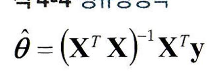




theta hat은 비용함수를 최소하하는 세타, y는 y(1)부터 y(m)까지를 포함하는 타깃 벡터

이를 테스트하기 위해 선형처럼 보이는 데이터를 생성하고자 함

In [52]:
import numpy as np
X =2 * np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [53]:
#calculate theta hat with normal equation
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [54]:
theta_best

array([[3.83661789],
       [3.10898221]])

예상값과 비슷하긴 하나 가우시안 잡음으로 인해 원래 함수의 정확한 파라미터를 재현하지 못하여, theta hat을 이용하여 예측해보고자 함

In [55]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 3.83661789],
       [10.05458231]])

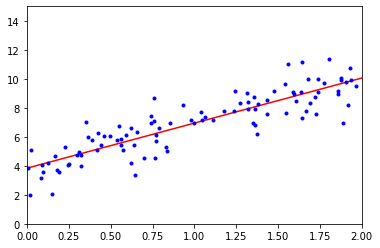

In [56]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [57]:
# in sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)


array([[ 3.83661789],
       [10.05458231]])

In [58]:
# 이 함수는 theta hat = X**-1 * y를 계산함 ( 이때 X**-1은 X유사역행렬)
# np.linalg.pinv()를 이용하여 유사역행렬을 구할 수 있음
np.linalg.pinv(X_b).dot(y)

array([[3.83661789],
       [3.10898221]])

- 유사역행렬 자체는 특잇값 분해라 부르는 표준행렬분해기법을 사용해 계산되는 것으로 특잇값 분해는 훈련세트 행렬 X를 세개의 행렬곱셈 U*sigma*V.T로 분해하며 이에 필요한 것들을 계산하기 위해 알고리즘이 시그마를 먼저 구하고 그 다음 어떤 낮은 임계값보다 작은 모든 수를 0으로 바꾸며 그 다음 0이 아닌 모든 값을 역수로 치환하고 마지막으로 나온 행렬은 전치하여 정규방정식보다 더 효율적인 방식으로 구함

- 또한 이 방식은 정규방정식에서 해를 구할 수 없는 극단적인 경우에서도 항상 구할 수 있음

## 4.1.2 계산복잡도
- 역행렬을 계산하는 계산복잡도는 일반적으로 O(n**2.4)에서 O(n**3)정도로 특성수가 두배 늘어나면 계산 시간이 대략 5.3에서 8배로 증가함

- 사이킷런의 Linear regression 클래스가 사용하는 SVD방법은 O(n**2) 정도로 특성개수가 2배로 들어나면 계산 시간이 대략 4배가 됨

- 특성이 매우 많고 훈련 샘플이 많을 ㄸ ㅐ사용하는 방법!

## 4.2 경사 하강법
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘으로 경사하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- 파라미터 벡터 theta에 대해 비용함수의 현재 그래디언트를 계산하고 그래디언트가 감소하는 방향으로 진행하다 보면 그래디언트가 0이 되는 지점에 도달하는데, 이 지점이 바로 최솟값

- theta는 임의값으로 시작해서(무작위 초기화) 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할때ㅏㄲ지 점진적으로 향상시킴

- 경사하강법에서 가장 중요한 파라미터는 스텝의 크기로 학습률 하이퍼파라미터로 결정이 되는데, 학습률이 너무 작으면 반복이 많아져 시간이 많이 소요됨

- 반면 학습률이 너무 커도 골짜기를 가로질러 반대편으로 건너뛰어 발산하여 시간이 또 오래걸림

- 모델훈련은 이러한 비용함수를 최소화하는 여러가지 모델 파라미터의 조합을 찾는 일로 이를 파라미터 공간에서 찾는 것

## 4.2.1 배치경사하강법
- 경사 하강법을 구현하기 위해서는 각 모델 파라미터 세타에 대해 비용함수의 그레디언트를 게산해야하는데, 다시 말해 세타 변경시 비용함수가 얼마나 변화하는 지를파악하는 것으로 이를 편도함수라 함

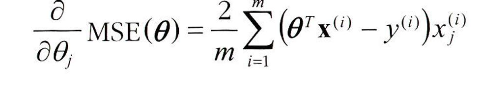




편도함수를 각각 계산하는 대신 식 4-6을 사용하여 한꺼번에 계산할 수 있는데, 이를 하기 위해선 모델파라미터마다 한개씩인 편도함수를 각 비용함수의 것으로 담는 그레디언트 벡터를 담음

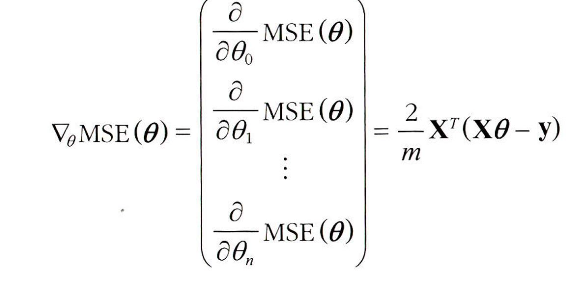

위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야함

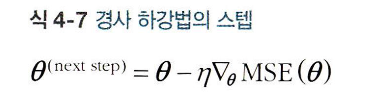

In [59]:
#algorithm with code
eta = 0.1
n_iterations =1000 # learning rate
m=100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients =2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [60]:
theta

array([[3.83661789],
       [3.10898221]])

> 학습률을 바꿀 경우

1) 학습률이 너무 낮을 경우 알고리즘은 최적점에 도달해도 소요 시간이 긺

2) 적당하면 반복 몇번만에 최적점에 수렴

3) 너무 높으면 널뛰면서 스텝마다 최적점에서 점점 멀어져 발산


- 적절한 학습률을 찾기 위해서 그리드 탐색을 사용하는데 이마저도 너무 오래 걸릴 경우를 대비하여 반복횟수를 제한하여야 함

- 너무 작을 경우 최적점에 도달하기전에 알고리즘이 멈추고 너무 클경우 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 됨

- 간단한 해결책은 반복횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면( 벡터의 노름이 어떤 값 - 허용오차 - 보다 작아지면 )경사 하강법이 거의 최솟값에 도달한 것이므러 알고리즘을 중지하는 것

- 수렴율: 비용함수가 볼록함수이고 기울기가 급격히 바뀌지 않는 경우 학습률을 고정한 배치경사 하강법은 결국 최적의 솔루션에 도달할 것! eta 범위 안에서 최적의 솔루션에 도달하기 위해서는 O(1/eta)만큼의 반복이 걸리는 것으로, 더 정확한 최솟값을 얻기위해서 허용오차를 줄이면 그만큼 반복횟수가 역수로 늘어남

## 4.2.2 확률적 경사 하강법

- 배치경사하강법의 가장 큰 문제는 매 스텝에서 훈련세트를 사용해 그레디언트를 계산하는 것으로 시간이 많이 소요되는 반면, 이와 반대로 확률적 경사하강법은 매 스텝에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산하는 것으로 매반복에서 다뤄야할 데이터가 매우 적어 알고리즘이 훨씬 빠르며 더 큰 훈련세트 또한 사용 가능

- 반면 확률적(무작위)이기 떄문에 훨씬 불안정하며 비용함수가 최솟값에 다다를때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소하기 때문에 알고리즘이 멈출 떄 구해지는 좋은 파라미터는최적이ㅡ 파라미터를 보장할 수 없음

- 비용함수가 불규칙할경우 알고리즘이 지역최솟값을 건너뛸 수 있으므로 확률적 경사하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음

- 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 때문에 이를 해결하기 위해서는 학습률을 점진적으로 감소시켜야 함

- 초기 학습률은 크고 점차 줄어드는 이 방법은 금속공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링 과정에서 영감을 얻은 담금질 기법이라 하는데, 학습률을 결정하는 함수인 학습스케줄을 결정하는 것으로 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 조기중단으로 인해 지역 최솟값에 머무를 수 있음

In [61]:
# 학습스케줄을 사용한 확률적 경사하강법의 구현
n_epochs=50
t0, t1=5,50
def learning_schedule(t):
  return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta =learning_schedule(epoch * m + i)
    theta = theta - eta *gradients

일반적으로 한 반복에서 m번 되풀이되고 이러한 반복을 에폭이라 하는데, 배치경사 하강법 코드가 전체 훈련세트에 대해 1000번 반복하는 동안 이 코드는 50번만에 좋은 값에 도달함

In [62]:
theta

array([[3.87673902],
       [3.10043528]])

- 샘플은 무작위로 선택되기 때문에 어떤 샘플은 한 에폭 내에서 여러번 선택될 수 있고 선택되지 않을 수 있음. 이러한 일을 방지하기 위해(알고리즘이 모든 샘플을 에폭마다 사용하게 하려면) 훈련세트를 섞은 후 (입력특성과 레이블을 동일하게 섞어야함) 차례대로 하나씩 선택하고 다음 에폭에서 다시 섞는 식의 방식을 사용할 수 있으나 시간적인 문제 발생(수렴까지의 시간 다수 소요)

- 사이킷런에서 Sgd 방식으로 선형회귀를 사용하려면 기본값으로 제곱오차비용함수를 최적화하는 SGDRegressor 클래스를 사용하는 것으로 max_iter에 지정된 횟수만큼 최대 실행되며 tol에 지정된 수만큼 적게 손실이 줄어들 때까지 실행되고, 학습률(eta0)로 기본 학습 스케줄을 사용함

In [63]:
#NOne of penalty
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [64]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77016479]), array([3.06805311]))

## 4.2.3 미니배치 경사 하강법
- 마지막 경사하강법 알고리즘은 미니배치 경사 하강법으로 각 스텝에서 전체훈련세트나 하나의 샘플을 기반으로 계산하는 것이 아닌, 미니배치라 하는 임의의 작은 샘플세트에 대해 그래디언트를 계산하는 것으로 GPU를 사용하면서 성능향상이 이루어짐

- 미니배치가 어느정도 커지면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하며 최솟값에 더 가까울 수 있으나 지역최솟값에서 빠져나오기 더 힘들 수 있음

- 최솟값 근처에 도달했으나 배치경사의 경로가 최솟값에서 멈춘 반면 확률적 경사와 미니배치 경사는 근처에서 멈돌았음. 단 배치경사의 경우 매스탭에서 많은 시간이 소요되며, 확률적과 미니배치 또한 적적한 학습스케줄을 사용하면 최소값에 도달할 수 있음

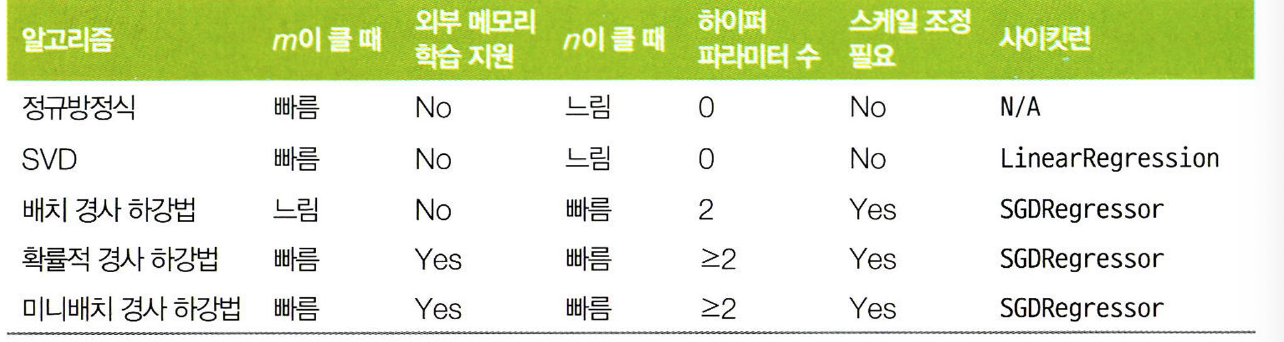

## 4.3 다항회귀
각 특성의 거듭제곱을 새 특성으로 추가하고 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 다항회귀는 단순 직선보다 복잡한 형태에서 아용됨

In [65]:
m=100
X = 6*np.random.rand(m,1)-3
y=0.5 * X**2 + X + 2 + np.random.randn(m,1)


In [66]:
#직선이 아니므로 훈련데이터의 변환이 필요함
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.20929967,  0.04380635])

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81728638]), array([[0.95189681, 0.52564741]]))

잡음이 있음에도 불구하고 실제모델과 예측 모델에서 큰 차이가 없는 것으로 특성이 여러개일 때 특성 사이의 관계를 찾을 수 있는 다항회귀 덕분! Polynomialfeatures가 주어진 차수까지 특성간의 모든 교차항을 추가하기 때문

##4.4 학습곡선
- 고차다항회귀를 적용하면 보통의 선형회귀보다 더 훈련데이터에 잘 맞추려 할 것. 300차 다항회귀는 훈련샘플에 가까이 가기위해 구불구불하게 나타남

- 고차다항회귀는 과대적합 되는 반면 선형모델은 과소적합되므로 가장 일반화가 잘 될 모델은 2차 다항회귀임. 이는 2차방정식으로 생성된 데이터이기 때문에 당연한 결과이지만 일반적으로는 생성 함수를 파악할 수 없기 때문에 과대 적합 및 과소적합을 파악하기 위해서는 학습곡선을 살펴볼필요가 있음.


In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict (X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="훈련세트")
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증세트')

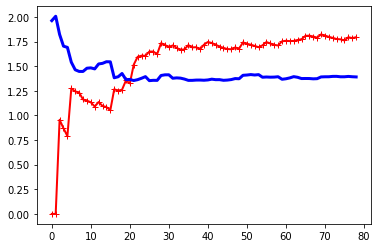

In [69]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


- 과소적합, 훈련데이터의 성능 그래프가 0에서 시작하므로 훈련세트에 샘플이 적게 있을 땐 모델이 완벽하게 작동하나 훈련세트에 샘플이 점차 늘어감에 따라 잡음이 생기며 비선형 모델이라 완벽히 학습하는 것이 어려워짐. 따라서 곡선이 평편해질때까지 오차가 계속 상승됨.

- 검증데이터에 대한 모델성능, 모델이 적은 수의 훈련샘플로 훈련될 때는 제대로 일반화될 수 없어 검증오차가 초기에 크나 모델에 훈련샘플이 추가됨에 따라 학습이 되고 검증오차가 점차 감소, 하지만 선형회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차감소가 완만해지면서 훈련세트의 그래프와 가까워짐

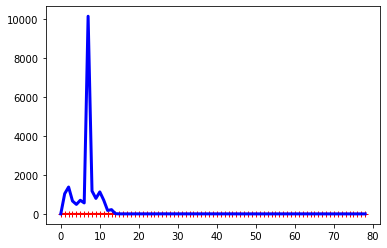

In [70]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)

- 유사해 보이나 훈련데이터의 오차가 선형회귀모델보다 훨씬 낮으며 두 곡선 사이에 공간이 존재. 이는 훈련데이터에서의 모델 성능이 검증데이터에서보다 훨씬 낫다는 뜻이며 이는 과대적합 모델의 특징. 하지만 이는 더 큰 훈련세트를 이용하면 두 곡선이 점차 가까워지면서 개선됨

- 편향/분산 트레이드 오프:

통계학과 머신러닝에서 나온 중요한 이론 중 하나는 세가지 다른 종류의 오차의 합으로 일반화 오차를 표현할 수 있다는 것
 > 편향: 일반화 오차중에서 편향은 잘못된 가정으로 인한 것으로 데이터가 실제로 2차인데 선형으로 가정하는 것. 큰 모델은 과소적합되기 쉬움

 > 분산: 훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타나는 것으로 자유도가 높은 모델이 높은 분산을 가져 훈련데이터에 과대적합되기 쉬움

> 줄일 수 없는 오차: 데이터 자체의 잡음으로 인해 발생하는 것으로 이는 데이터 자체의 잡음을 제거하는 방법밖에 없음

## 4.5 규제가 있는 선형 모델

과대 적합 감소방안으로 좋은 방법은 모델을 규제하는 것인데, 자유도를 줄이거나 다항회귀에서 다항식의 차수를 감소시키는 것

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가하는 등 각자 다른 방법으로 가중치를 제한하여 규제함

## 4.5.1 릿지 회귀
- 규제가 추가된 헌형 회귀 버전으로 규제항이 비용함수에 추가되며 이는 데이터에 학습 알고리즘을 맞출 뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력함

- 규제항은 훈련동안만 비용함수에 추가되며 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능지표로 평가함

- 하이퍼 파라미터 alpha는 모델을 얼마나 많이 규제할지 조절하는 것으로 alpha가 0이면 릿지회귀는 선형회귀와 동이라혐 아주 크면 모든 가중치가 0에 가까ㅜ어져 데이터의 평균을 지나는 수평선이 됨

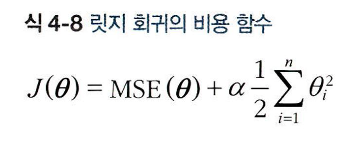

편향 세타 제로는 규제되지 않으며 w를 특성으 ㅣ가중치벡터라 정의하면 규제항은 가중치벡터의 t2노름과 동일. 경사하강법에 적용하려면 MSE 그레디언트 벡터에 alpha W를 더함녀 됨

- 선형 데이터에 몇가지 다른 알파를 사용해 릿지모델을 훈련시킨 결과 알파를 증가시킬수록 직선에 가까워지는 것을 볼 수 있음. 즉 분산은 줄지만 편향이 증가하게 됨

- 릿지회귀 계산을 위해서도 정규방정식을 사용할 수 있고 경사하강법을 사용할 수 도 있음.

- 사이킷런에서 정규방정식을 사용한 릿지회귀를 적용하면

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[4.68450342]])

In [72]:
#확률적 경사하강법
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.65624703])

penalty매개변수는 사용규제를 지정하는 것으로 l2는 SGD가 비용함수에 가중치벡터의 t2노름의 제곱을 2로나눈 규제항을 추가하게 만드는 릿지회귀를 의미

## 4.5.2 라쏘 회귀
라쏘 회귀는 선형회귀의 또 다른 규제된 버전으로 t2노름의 제곱을 2로 나눈 것 대신 가중치벡터의 t1노름을 사용하는 것으로
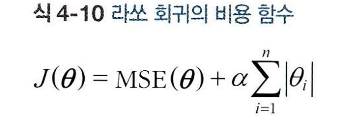

덜 중요한 특성의 가중치를 제거하려고 하는 특성을 가져 자동으로 특성선택을 하고 희소모델을 만듦

- 두 축은 모델 파라미터 두개를 나타내고 배경의 등고선은 각기 다른 손실함수를 나타내나 왼쪽 위 그래프의 등고선은 L1손실을 나타내 축에 가까워질수록 선형적으로 감소함

- 예를 들어 모델 파라미터를 초기화하고 경사하강법을 실행하면 두 파라미터가 동일하게 감소하여 세타2가 0에 먼저 도달하고 경사하강법이 세타1=0에 도달할때까지 축을 따라 내려감. 

- 아래의 두개 그래프도 동일하지만 l2페널티를 이용하여 엘2 손실이 원점에 가까울 수록 줄어드는 것을 확인할 수 있으며 경사하강법이 원점까지 직선 경로를 따라가는 것을 알 수 있음

- 둘의 차이는 첫째로 파라미터가 전역 최적점에 가까워질수록 그레디언트가 작아지며 경사하강법이 자동으로 느려지고수렴에 도움이 됨(진동X). 두번째로 알파가 증가시킬수록 최적의 파라미터가 원점에 더 가까워지나 완전히 0이 되진 않음

- 라쏘 사용시 경사하강법이 최적점 근처에서 진동하는 것을 막으려면 점진적으로 훈련동안 학습률을 감소시켜야 함

- 라쏘의 비용함수는 theta가 0일 때 미분가능하지 않으나 이 때 서브 그레디언트 벡터를 이용하면 경사하강법을 사용하는데 문제가 없음

> 서브그레디언트 공식

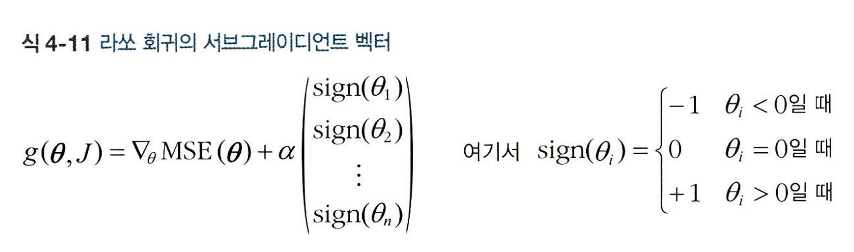

In [73]:
#Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])
#instead of Lasso, SGDRegressor (penalty = "L1") can replace

array([4.62907724])

## 4.5.3 엘라스틱넷
릿지와 라쏘의 절충안으로 규제항은 릿지와 회귀의 규제항을 단순히 더해 사용하며 혼합정도는 혼합비율 r을 사용해 조절. r=0일 경우 엘라스틱넷은 릿지회귀와 같고, 1이면 라쏘회귀와 같음

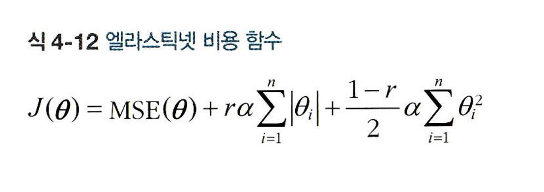

- 보통의 선형회귀, 릿지, 라쏘, 엘라스틱넷중 어떤 것을 언제 사용해야할까? 대개 규제가 약간 있는 것이 대부분 좋으므로 선형회귀는 피하고 릿지가 기본이 되지만 쓰이는 특성이 몇개뿐이라 의심되면 라쏘나 엘라스틱넷이 나음. 특성수가 훈련샘플수보다 많거나 특성 몇개가 강하게 연관되어 있을떄는 보통 라쏘가 문제를 일으키므로 엘라스틱 넷을 선호함

In [74]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.62942336])

## 4.5.4 조기종료
검증에러가 최솟값에 도달하면 훈련을 중기시키는 규제옵션 또한 존재하는데 이를 조기종료라 함.

- 에폭이 진행됨에 따라 알고리즘이 학습되면서 훈련세트에 대한 예측에러(RMSE)와 검증세트에 대한 예측에러가 감소하나 감소하던 검증에러가 멈추었다 다시 상승함. 즉 과대적합이 시작되었다는 뜻이기 때ㅔ문에 검증에러가 최소에 도달할경우 멈추는 것이 에러개선에 도움이 됨



In [85]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

#data set
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_sclaed = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start = True,
                       penalty=None, learning_rate = "constant", eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

InvalidParameterError: ignored

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

## 4.6 로지스틱 회귀
분류에서도 사용 가능한 회귀로 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용되는 것. 추정 확률이 50퍼센트가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측하거나 속하지 않는다고 예측하는 이진 분류기로 사용됨

## 4.6.1 확률 추정

로지스틱회귀모델은 입력특성의 가중치합을 계산 후 편향을 더하고 결괏값의 로지스틱을 출력함
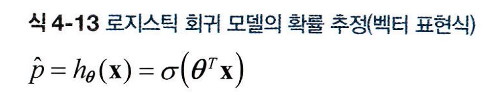


로지스틱은 0과 1사이 값을 출력하는 시그모이드 함수로 다음과 같이 표현할 수 있음

시그모이드(t) = 1 / (1 + exp(-t) )

로지스틱 회구모델이 샘플x가 양성클래스에 속할 확률 phat = htheta (x ) 를 추정하면 이에 대해 yhat을 쉽게 구할 수 있음

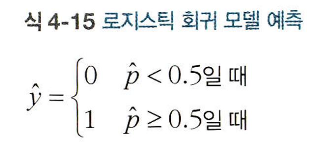



t가 음수이면 시그모이드 t 또한 0.5 미만이고, t가 양수이면 sigmoid(t) 도한 0.5이상이므로 로지스틱 회귀모델은 양수일 때 양성클래스 음수일 때 음성클래스라 예측함

## 4.6.2 훈련과 비용함수
훈련의 목적은 양성샘플에 대해서는 높은 확률을 추정하고 음성샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 theta를 찾는 것으로 이러한 아이디어는 하나의 훈련샘플 x에 대해 나타낸 비용함수에 잘 드러나 잇음

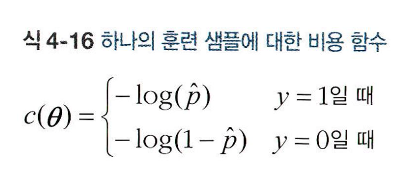

이 비용함수는 t가 0에가까워지면 전체식이 매우 커지므로 타당함. 즉 모델이 양성샘플을 0에가까운 확률로 추정하면 비용이 크게 증가하고 음성샘플을 1에 가깝게 추정해도 비용이 증가함. 반면 t가 1에 가까우면 전체식이 0에 가까워짐. 즉 기대한 바와 같이 음성샘플의 확률을 0에 가깝게 추정하거나 양성샘플의 확률을 1에 가깝게 추정하면 비용이 0에 가까워짐

- 전체 훈련세트에 대한 비용함수는 모든 훈련샘플의 비용을 평균한 것으로 이를 로그손실이라 부르며 하나의 식으로 다음과 같이 표현할 수 있음

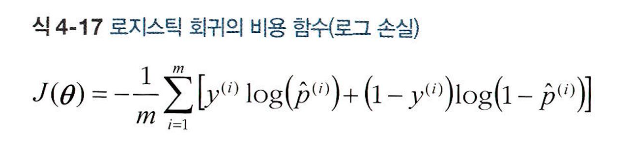

이러한 비용함수의 최솟값을 계산하는 알려진 해가 없으나 볼록함수이기 때문에 경사하강법이 전역 최솟값을 찾는 것을 보장하므로 이 비용함수의 j번쨰 모델 파라미터에 대해 편미분을 하면
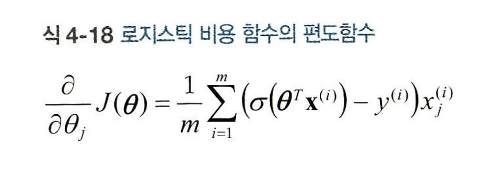

각 샘플에 대해 예측오차를 계산하고 j번째 특성값을 곱해 모든 훈련샘플에 대해 평균을 냄

모든 편도함수를 포함한 그레디언트 벡터를 만들면 배치경사 하강법 알고리즘을 사용할 수 있음

## 4.6.3 결정 경계
로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용하고자 함

In [77]:
# 꽃잎 너비 기반의 iris versicolor 종을 감지하는 분류기를 만들고자 함
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [78]:
X=iris['data'][:, 3:]
y=(iris['target']==2).astype(np.int)

<ipython-input-78-157934755ec0>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris['target']==2).astype(np.int)


In [79]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

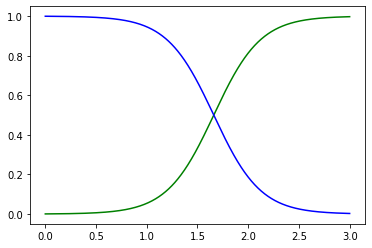

In [80]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b-", label="Not Iris virginica")



verginica와 다른 붓꽃의 꽃잎너비 분포 중 중첩되는 부분이 존재하여 이 부분에 대해 분류가 확실하지 않아 가장 가능성 높은 클래스를 반환하게 되는데, 이 때 확률분포상 50퍼센트를 의미하는 1.6cm에서 근방경계가 존재하게 됨


In [81]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

데이터셋을 꽃잎 너비와 꽃잎 길이 두개의 특성으로 분류하는 훈련이 끝나면 로지스틱 회귀분류기가 새 꽃이 verginica일 확률을 추정해주는데 그래프상 50퍼센트를 추정하는 지점은 선형

따라서 로지스틱 회귀모델도 l1, l2 페널티를 이용하여 규제가능

## 4.6.4 소프트맥스 회귀

- 다중클래스를 지원하도록 일반화하는 소프트맥스 회귀 또는 다항 로지스틱 회귀는 샘플 x가 주어지면 소프트맥스 회귀모델이 각 클래스 k에 대한 점수 sk(x)를 계산하고, 그 점수에 소프트맥스함수를 적용하여 각 클래스의 확률을 추정함

- 각 클래스는 자신만의 파라미터 벡터 세타가 존재하는데, 이 벡터들은 파라미터 행렬에 행으로 저자오딤

- 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 p를 추정할 수 있는데 이 함수는 각 점수에 지수함수를 적용한 후 정규화하는 것

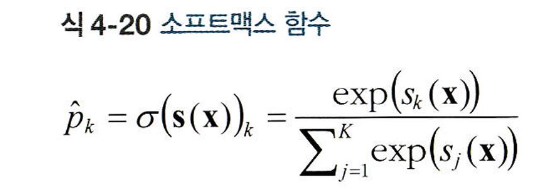

K는 클래스 수, s(x) 는 샘플 x에 대한 각 클래스의 점수를 담은 벡터, 시그모이드(s(x))는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정확률
- 소프트맥스 회귀분류기는 춪어확률이 가장 높은 클래스를 선택

- 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만든느 것이 목적으로 크로스엔트로피 비용함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합함

- 크로스엔트로피는 추정된 클래스의 확률이 타깃클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용되는 것으로, 두개의 클래스가 있을 때는 비용함수가 로지스틱 회귀의 비용함수와 동일함

- 크로스 엔트로피: 선택사항마다 전송한 평균 비트수를 측정하여 데이터의 가정이 완벽할 경우 데이터 자체의 엔트로피와 크로스 엔트로피가 동일하도록 하는 것으로 데이터에 대한 가정이 틀렸다면 쿨백라이블러 발산이라 불리는 양만큼 엔트로피 양이 증가한느 것

- 각 클래스에 대해 그레디언트 벡터를 계산할 수 잇으므로 비용함수를 최소화하기 위한 파라미터 행렬을 찾기 위해 경사하강법을 사용할 수 있음



In [82]:
# multi class 매개변수를 multinomial 로 바꾸면 소프트맥스 회귀 사용 가능
# 소프트맥스 회귀 사용시 solver 에 lbfgs와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야함
X=iris['data'][:, (2,3)]
y=iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [83]:
softmax_reg.predict([[5,2]])

array([2])

In [84]:
softmax_reg.predict_proba([[5,2]])
# 클래스사이 결정경계가 모두 선형이며 iris versicolor 클래스에 대한 확률을 곡선으로 나타냄!

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])